# Piecewise Exact Method: Influence of force segmentation

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
from piecewise_method import calculateResponse

# System constants
m = 1000        # Mass [kg]
k = 20000       # Stifness [N/m]
xi = 0.05       # Damping ratio
P = 750         # Force magnitude [N]
f = 1           # Force frequency [Hz]

# Calculating dynamic parameters
omega_n = np.sqrt(k / m)                # Natural frequency [rad/s]
f_n = omega_n / (2 * np.pi)             # Undamped natural frequency [Hz]
omega_d = omega_n * np.sqrt(1 - xi**2)  # Damped natural frequency [rad/s]
omega = 2 * np.pi * f                   # Force frequency [rad/s]
beta = omega / omega_n                  # Frequency ratio

# Defining a "experimental force" vector
t_max = 30                              # Maximun time [s]
delta_t = 0.005                         # Time step [s]
nPoints = int(t_max / delta_t)          # Number of data points -> int
t = np.linspace(0, t_max, nPoints)      # Time vector [s]

P_sine = P * np.sin(omega * t)          # Experimental harmonic force [N]

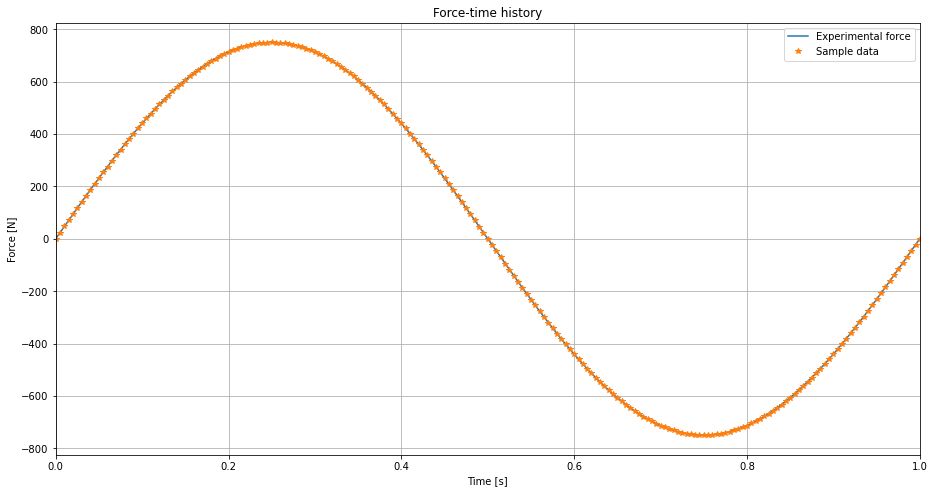

In [2]:
# Plotting the data
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2, 1.5])
axes.plot(t, P_sine, label="Experimental force")
axes.plot(t, P_sine, "*", label="Sample data")
axes.legend()
axes.set_title("Force-time history")
axes.set_xlim([0, 1])
axes.set_xlabel("Time [s]")
axes.set_ylabel("Force [N]")
axes.grid()
fig.show()

### Defining a function to generate piecewise linear force vectors

In [3]:
def generateForce(nSegs_per_cycle, t_max, P):
    """Function to generate piecewise linear force vectors
    nSegs_per_cycle... the number of linear segments in a single cycle
    t_max... the length of the force record to be sampled
    P... the magnitude of the sine wave being sampled"""

    nSegments = nSegs_per_cycle * t_max                                 # The number of segments of the force function
    sample_times = np.linspace(0, t_max, nSegments + 1, endpoint=True)  # Sampling time
    force_sample_points = P * np.sin(omega * sample_times)              # Sample points

    # Generate the time and force vectors
    F = np.array([])
    T = np.array([])

    for n in np.arange(nSegments):
        if n == nSegments - 1:
            forceVector = np.linspace(force_sample_points[n], force_sample_points[n + 1], int(nPoints / nSegments), endpoint=True)
            timeVector = np.linspace(sample_times[n], sample_times[n + 1], int(nPoints / nSegments), endpoint=True)
        else:
            forceVector = np.linspace(force_sample_points[n], force_sample_points[n + 1], int(nPoints / nSegments), endpoint=False)
            timeVector = np.linspace(sample_times[n], sample_times[n + 1], int(nPoints / nSegments), endpoint=False)

        F = np.append(F, forceVector, axis=0)
        T = np.append(T, timeVector, axis=0)
    
    return T, F, sample_times, force_sample_points

### Calling function to generate piecewise linear force vectors

In [4]:
T4, F4, sp4, f_sp4 = generateForce(4, t_max, P)             # Force record at 4 Hz
T8, F8, sp8, f_sp8 = generateForce(8, t_max, P)             # Force record at 8 Hz
T20, F20, sp20, f_sp20 = generateForce(20, t_max, P)        # Force record at 20 Hz
T40, F40, sp40, f_sp40 = generateForce(40, t_max, P)        # Force record at 40 Hz

### Plotting the piecewise linear force

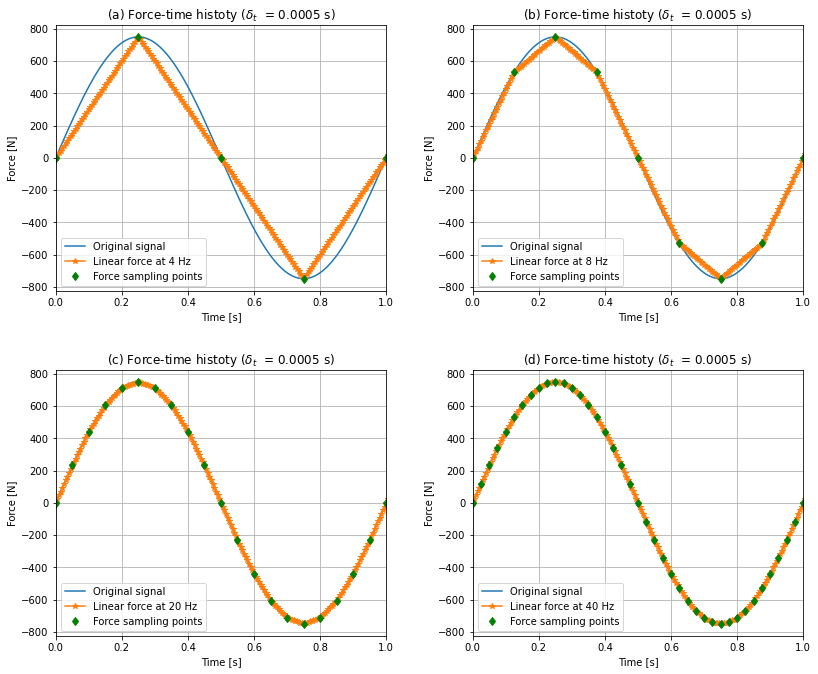

In [5]:
# Plotting
fig, axes = plt.subplots(figsize=(12, 10), nrows=2, ncols=2)

axes[0][0].plot(t, P_sine, label="Original signal")
axes[0][0].plot(T4, F4, "-*", label="Linear force at 4 Hz")
axes[0][0].plot(sp4, f_sp4, "gd", label="Force sampling points")
axes[0][0].set_xlabel("Time [s]")
axes[0][0].set_ylabel("Force [N]")
axes[0][0].set_title("(a) Force-time histoty ($\delta_t$  = 0.0005 s)")
axes[0][0].legend(loc="lower left")
axes[0][0].set_xlim([0, 1])
axes[0][0].grid()

axes[0][1].plot(t, P_sine, label="Original signal")
axes[0][1].plot(T8, F8, "-*", label="Linear force at 8 Hz")
axes[0][1].plot(sp8, f_sp8, "gd", label="Force sampling points")
axes[0][1].set_xlabel("Time [s]")
axes[0][1].set_ylabel("Force [N]")
axes[0][1].set_title("(b) Force-time histoty ($\delta_t$  = 0.0005 s)")
axes[0][1].legend(loc="lower left")
axes[0][1].set_xlim([0, 1])
axes[0][1].grid()

axes[1][0].plot(t, P_sine, label="Original signal")
axes[1][0].plot(T20, F20, "-*", label="Linear force at 20 Hz")
axes[1][0].plot(sp20, f_sp20, "gd", label="Force sampling points")
axes[1][0].set_xlabel("Time [s]")
axes[1][0].set_ylabel("Force [N]")
axes[1][0].set_title("(c) Force-time histoty ($\delta_t$  = 0.0005 s)")
axes[1][0].legend(loc="lower left")
axes[1][0].set_xlim([0, 1])
axes[1][0].grid()

axes[1][1].plot(t, P_sine, label="Original signal")
axes[1][1].plot(T40, F40, "-*", label="Linear force at 40 Hz")
axes[1][1].plot(sp40, f_sp40, "gd", label="Force sampling points")
axes[1][1].set_xlabel("Time [s]")
axes[1][1].set_ylabel("Force [N]")
axes[1][1].set_title("(d) Force-time histoty ($\delta_t$  = 0.0005 s)")
axes[1][1].legend(loc="lower left")
axes[1][1].set_xlim([0, 1])
axes[1][1].grid()

fig.tight_layout(pad=3.0)
fig.show()

## Calling the piecewise function to calculate response for different degrees of force segmentation

### Note. We assume $x_0$ = 0 and $v_0$ = 0 for all the cases.

In [6]:
position, velocity = calculateResponse(t, P_sine, 0, 0, k, omega_n, omega_d, xi, delta_t)
position_4, velocity_4 = calculateResponse(T4, F4, 0, 0, k, omega_n, omega_d, xi, delta_t)
position_8, velocity_8 = calculateResponse(T8, F8, 0, 0, k, omega_n, omega_d, xi, delta_t)
position_20, velocity_20 = calculateResponse(T20, F20, 0, 0, k, omega_n, omega_d, xi, delta_t)
position_40, velocity_40 = calculateResponse(T40, F40, 0, 0, k, omega_n, omega_d, xi, delta_t)

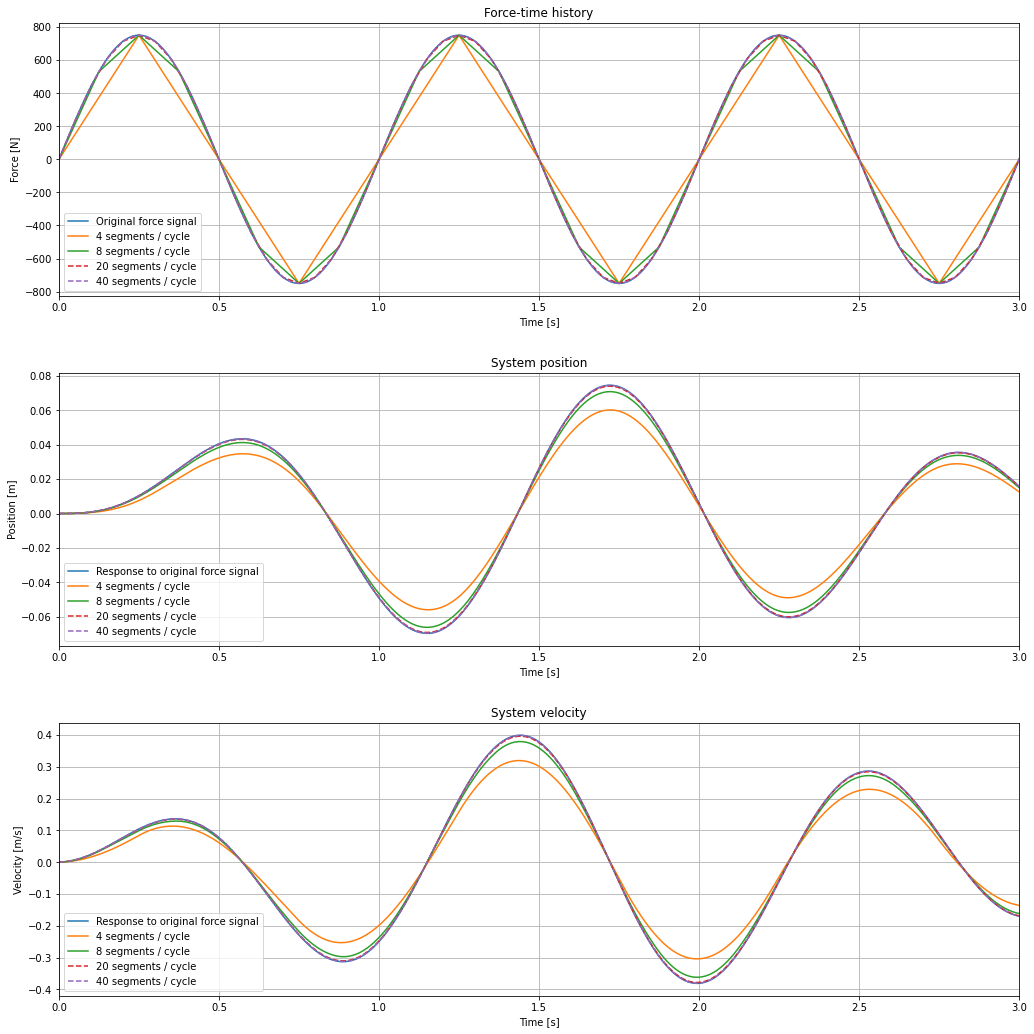

In [11]:
# Plotting the results
fig, axes = plt.subplots(figsize=(15, 15), nrows=3, ncols=1)

# Force plots
axes[0].plot(t, P_sine, label="Original force signal")
axes[0].plot(T4, F4, "-", label="4 segments / cycle")
axes[0].plot(T8, F8, "-", label="8 segments / cycle")
axes[0].plot(T20, F20, "--", label="20 segments / cycle")
axes[0].plot(T40, F40, "--", label="40 segments / cycle")
axes[0].set_title("Force-time history")
axes[0].set_xlim([0, 3])
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Force [N]")
axes[0].legend(loc="lower left")
axes[0].grid()

# Position plot
axes[1].plot(t, position, label="Response to original force signal")
axes[1].plot(T4, position_4, "-", label="4 segments / cycle")
axes[1].plot(T8, position_8, "-", label="8 segments / cycle")
axes[1].plot(T20, position_20, "--", label="20 segments / cycle")
axes[1].plot(T40, position_40, "--", label="40 segments / cycle")
axes[1].set_title("System position")
axes[1].set_xlim([0, 3])
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Position [m]")
axes[1].legend(loc="lower left")
axes[1].grid()

# Velocity plot
axes[2].plot(t, velocity, label="Response to original force signal")
axes[2].plot(T4, velocity_4, "-", label="4 segments / cycle")
axes[2].plot(T8, velocity_8, "-", label="8 segments / cycle")
axes[2].plot(T20, velocity_20, "--", label="20 segments / cycle")
axes[2].plot(T40, velocity_40, "--", label="40 segments / cycle")
axes[2].set_title("System velocity")
axes[2].set_xlim([0, 3])
axes[2].set_xlabel("Time [s]")
axes[2].set_ylabel("Velocity [m/s]")
axes[2].legend(loc="lower left")
axes[2].grid()

fig.tight_layout(pad=3.0)
fig.show()